<a href="https://colab.research.google.com/github/wasp33/ximen0703/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markdown
Latex math 語法

$ y = \frac{1}{x+2} \pi \sum_{i=1}^n{a_i} $
準備資料多寡 = 問題難易度(欄位多寡)

機器學習: k-w
深度學習: w-10w
>https://scikit-learn.org/stable/datasets/toy_dataset.html

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame(2D) Series(1D)
data = pd.DataFrame(iris["data"], columns=iris["feature_names"])
data["ans"] = iris["target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
from sklearn.model_selection import train_test_split
x = data.drop("ans", axis=1)
y = data["ans"]
# [90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:

# demo
train_test_split([1, 2, 3, 4, 5],
         [6, 7, 8, 9, 10],
         test_size=0.2)

[[3, 2, 1, 4], [5], [8, 7, 6, 9], [10]]

In [17]:
# demo
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
d.drop("a", axis=1)

,b
a,2
b,4


決策樹
DecisionTreeClassifier()

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

figsize width,height

[Text(0.375, 0.9375, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [46, 42, 47]\nclass = virginica'),
 Text(0.25, 0.8125, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(0.5, 0.8125, 'petal length (cm) <= 4.75\ngini = 0.498\nsamples = 89\nvalue = [0, 42, 47]\nclass = virginica'),
 Text(0.25, 0.6875, 'petal width (cm) <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = versicolor'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.6875, 'petal length (cm) <= 5.05\ngini = 0.147\nsamples = 50\nvalue = [0, 4, 46]\nclass = virginica'),
 Text(0.625, 0.5625, 'sepal length (cm) <= 6.5\ngini = 0.444\nsamples = 12\nvalue = [0, 4, 8]\nclass = virginica'),
 Text(0.5, 0.4375, 'sepal width (cm) <= 3.1\ngini = 0.32\nsamples = 10\nvalue = [0, 2, 8]\nclass = virginica'),
 Text(0.375, 0.3125, 'petal width (cm) <=

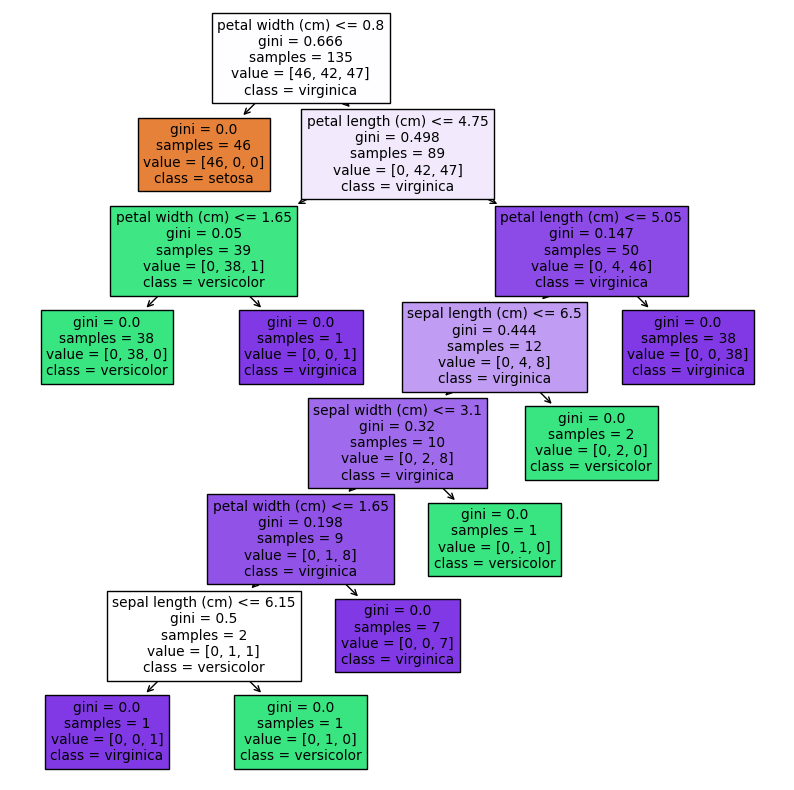

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10,10])
plot_tree(clf,
     feature_names=x.columns,
     class_names=iris["target_names"],
     filled=True)

使用 accuracy_score來調整最大深度 max_depth

In [39]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.8666666666666667